##Imports

In [586]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from geopy import Nominatim
from scipy.stats import multivariate_normal as mvn 

In [587]:
data=pd.read_csv('/content/raw_house_data.csv')

In [588]:
geolocator=Nominatim(user_agent="TfClan")

In [589]:
location=geolocator.geocode("721 N Erin Ave 85711")

In [590]:
testlat=location.raw["lat"]

In [591]:
testlong=location.raw["lon"]

In [592]:
test=data.iloc[0:1,3:5]

In [593]:
test.shape

(1, 2)

In [594]:
test['latitude']=testlat
test['longitude']=testlong

##Data Cleaning

In [595]:
data=data.iloc[:,1:]

Nan values in lot acres, spaces in fireplaces, got rid of commas to change hoa object to string to float, get rid of year=0, acres=0, sqft=0, sqft=none

In [596]:
data=data[data["lot_acres"]!=0.00]

In [597]:
data=data[data["sqrt_ft"]!=0.00]

In [598]:
data=data[data["sqrt_ft"]!="None"]

In [599]:
data=data.replace("None", 0)

In [600]:
data["fireplaces"]=data["fireplaces"].replace(' ', 0)

In [601]:
data["HOA"]=data["HOA"].replace(',','')

In [602]:
data.loc[data['lot_acres']==0]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


In [603]:
data["bathrooms"]=data["bathrooms"].astype(float)
data["sqrt_ft"]=data["sqrt_ft"].astype(float)
data["garage"]=data["garage"].astype(float)
data["fireplaces"]=data["fireplaces"].astype(str).astype(int)
data["HOA"]=data["HOA"].astype(str)
data["HOA"]=data["HOA"].str.replace(",","")
data["HOA"]=data["HOA"].astype(float)

In [604]:
#data.dtypes

Change objects to int, get rid of 0 sqrt ft values

In [605]:
data["price per acre"] = data["sold_price"]/data["lot_acres"]
data["price per bedroom"] = data["sold_price"]/data["bedrooms"]
data["price per latitude"] = data["sold_price"]/data["latitude"]
data["price per ft"] = data["sold_price"]/data["sqrt_ft"]

In [606]:
data=data.reset_index()

In [607]:
data=data.iloc[:,1:]

##Data Analysis

The area(lat,long,zip) affects the acres and that affects the sold price.

more lat=high sold price , more long=more acres, less latitude=more acres, newer houses cheaper

LOOK AT PRICE PER SQUARE FOOT(ACRE), you want to establish categories

In [608]:
data

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price per acre,price per bedroom,price per latitude,price per ft
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0,2.460539e+03,4.076923e+05,169024.710201,504.761905
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0,2.460457e+03,2.100000e+06,132935.737314,575.342466
2,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0.0,7.068026e+03,6.428571e+05,142198.614303,498.946668
3,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0,1.062757e+06,8.528625e+05,105666.188077,533.372420
4,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422.0,1.946108e+06,1.083333e+06,100497.571206,475.007308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0.0,9.939759e+04,9.900000e+04,15513.391238,137.461816
4905,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0,3.873239e+05,1.375000e+05,17019.236658,237.273512
4906,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0.0,3.938640e+04,1.583333e+05,14409.349538,268.058691
4907,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0.0,5.445545e+05,1.375000e+05,17029.513478,147.690655


only low latitudes have large houses, high altitudes only have small houses,30-32 is one set and 32-35 is another set, looks like size decreases as you go from center of set

Price per acre highest at 32-32.7

Newer houses more price per acre

Price per acre between -111.5 and -110.8 higher than rest, desirable area

CHECK ALL DATA TYPES, bathrooms is an object

No way to use linear regression only to estimate price because of location, maybe use different locations as sets, have to use both classification and regression, no linear correlation between location and price, price per sqrt ft stays constant in particular neighbourhood so class them like that, we get text address which we get lat,long from, we decide input features, use case for finding price per sqr ft

## Making classes based on ppsft

In [609]:
#data=data[(data["sqrt_ft"]<6500) & (data["sqrt_ft"]>6000)]

In [610]:
data[(data["price per ft"]<400) & (data["price per ft"]>100)].shape

(4800, 19)

In [611]:
data["class"]=data["zipcode"]
for i in range(0,len(data)):
  if data["price per ft"][i]<150:
    data.loc[i,'class']=0
  elif 150<=data["price per ft"][i]<300:
    data.loc[i,'class']=1  
  elif 300<=data["price per ft"][i]<450:
    data.loc[i,'class']=2
  else:
    data.loc[i,'class']=3
  '''
  elif 150<=data["price per ft"][i]<200:
    data.loc[i,'class']=3
  elif 200<=data["price per ft"][i]<250:
    data.loc[i,'class']=4
  elif 250<=data["price per ft"][i]<300:
    data.loc[i,'class']=5
  '''
  
  

  '''
  elif 150<=data["price per ft"][i]<200:
    data.loc[i,'class']=3 
  elif 200<=data["price per ft"][i]<250:
    data.loc[i,'class']=4
  elif 250<=data["price per ft"][i]<300:
    data.loc[i,'class']=5
  '''
  

normalise your data

Plan:Assign class to each value using GB Classifier
      Predict a value using the regressor

In [612]:
#data[(data["price per ft"]<100) & (data["price per ft"]>10)]

In [613]:
#data.iloc[:6,:]

(-111.0, -110.8)

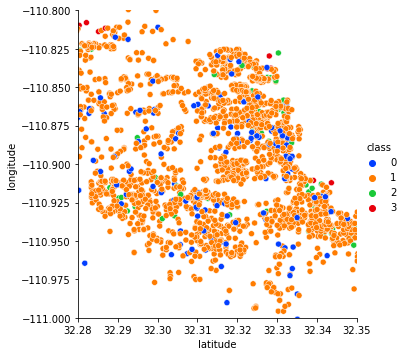

In [614]:
sn.relplot(data=data[(data["price per ft"]<1000) & (data["price per ft"]>0)],x="latitude",y="longitude",hue="class",palette="bright")
plt.xlim(32.28, 32.35)
plt.ylim(-111,-110.8)

Interesting groups, 150-160, 240-250

##Gauss Bayes

In [615]:
eps=4e-2

In [616]:
class GaussBayes():
  
    likelihoods = dict()   # 
    priors = dict()        # 
    K = int()              # K stands for the number of classes
  
    def fit(self, X, y, epsilon=eps):
        """ 
        Method for training the model
        Creates likelihoods and priors (AKA weights & Biases) the represent
        the trained value. 
        """
        self.K = set(y.astype(int)) 
        for k in self.K: 
            X_k = X[y==k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {
                "Mean": mu_k, # X_k.mean(axis=0), # Where the data is situated
                "CoVariance": 
                    (1/(N_k-1))
                    *np.matmul((X_k-mu_k).T, (X_k-mu_k))
                    +epsilon*np.identity(D)
            }
            self.priors[k] = len(X_k)/len(X)


    def predict(self, X):
        """
        Where inference happens. 
        Predicts the class for each instance of X with Bayes theorem using the 
        likelihoods and priors (weights & biases) calculated during training. 
        """
        N, D = X.shape  # numRows, numFeatures
        P_hat = np.zeros((N, len(self.K))) # Predictive Probability
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(
                X, 
                l["Mean"], 
                l["CoVariance"]) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

def acc(y, y_hat):
  return np.mean(y==y_hat)

In [617]:
gaussbayes = GaussBayes()

In [618]:
normX=data.iloc[:,2:4]

In [619]:
normy=data["price per ft"]

In [620]:
ymin=normy.min()

In [621]:
ymax=normy.max()

In [622]:
y=(normy-ymin)/(ymax-ymin)

In [623]:
longmin=normX["longitude"].min()

In [624]:
longmax=normX["longitude"].max()

In [625]:
latmin=normX["latitude"].min()

In [626]:
latmax=normX["latitude"].max()

In [627]:
normX["longitude"] = (data["longitude"]-longmax)/(longmax-longmin)

In [628]:
normX["latitude"] = (data["latitude"]-latmax)/(latmax-latmin)

In [629]:
normX

,longitude,latitude
0,-0.301273,-1.000000
1,-0.518910,-0.933403
2,-0.515828,-0.918938
3,-0.443359,-0.739943
4,-0.474944,-0.724843
...,...,...
4904,-0.393795,-0.845569
4905,-0.457969,-0.731204
4906,-0.424328,-0.549675
4907,-0.522223,-0.736664


In [630]:
X=normX

In [631]:
#X=data.iloc[:,2:4]

In [632]:
X=X.to_numpy()

In [633]:
X

array([[-0.30127342, -1.        ],
       [-0.51890977, -0.93340346],
       [-0.51582842, -0.91893764],
       ...,
       [-0.42432812, -0.5496749 ],
       [-0.52222307, -0.73666437],
       [-0.47574694, -0.99190905]])

In [634]:
y=data["class"]

In [635]:
y=y.to_numpy()

In [636]:
gaussbayes.fit(X, y, epsilon=eps)

In [637]:
GB_Yhat = gaussbayes.predict(X)

In [638]:
GB_Yhat

array([1, 1, 1, ..., 1, 1, 1])

In [639]:
acc(y, GB_Yhat)

0.8576084742310043

In [640]:
test=X[0:1,:]
test

array([[-0.30127342, -1.        ]])

In [641]:
test.shape

(1, 2)

In [642]:
classpredict=gaussbayes.predict(test)

In [643]:
classpredict

array([1])

In [644]:
classpredict[0]=classpredict

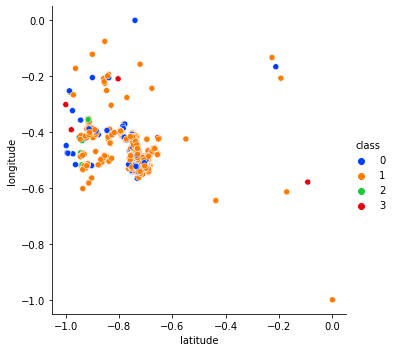

In [645]:
sn.relplot(data=data["price per ft"],x=normX["latitude"],y=normX["longitude"],hue=data["class"],palette="bright")
#plt.ylim(-0.55, -0.45)
#plt.xlim(-0.8,-0.65)

##Linear Regression

In [646]:
def OLS(Y,Y_hat,N):
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

def R2(Y,Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [647]:
class OurLinearRegression():

  def fit(self,X,y,eta=1e-9,epochs=3e2,show_curve=False):

    epochs=int(epochs)
    N,D=X.shape
    Y=y

    #Stochastic Gradient Descent:
    
    #Initialise the weights
    self.W=np.random.randn(D)

    J=np.zeros(epochs)

    #Gradient Descent Step

    for epoch in range(epochs):
      Y_hat=self.predict(X)
      J[epoch]=OLS(Y,Y_hat,N) #calculate error/loss
      #weight uptake rule
      self.W-=eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def predict(self,X):
    return X@self.W

In [648]:
X=data[['taxes','class','bedrooms','garage','sqrt_ft']].copy() #want to predict taxes using predicted class, add in sqrt ft

In [649]:
X=X.to_numpy()

In [650]:
y=X[:,0]

In [651]:
X=X[:,1:]

In [652]:
myreg=OurLinearRegression()

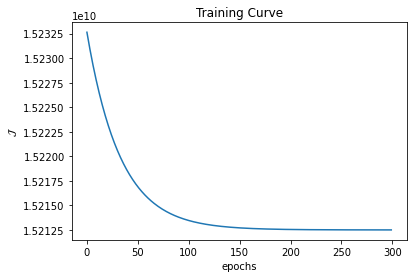

In [653]:
myreg.fit(X,y,epochs=3e2,eta=1e-9,show_curve=True)

In [654]:
bedpredict=3
garpredict=2
ftpredict=1200
Xtest=np.array([[classpredict,bedpredict,garpredict,ftpredict]]) #Values of each input we want to test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [655]:
myreg.predict(Xtest) #this gives prediction

array([array([3364.18699704])], dtype=object)

In [656]:
result=myreg.predict(Xtest)[0][0]

In [657]:
y_hat=myreg.predict(X)

In [658]:
R2(y,y_hat)

0.000999772576446456

use same types of house to plot and find areas

##Result

In [659]:
result

3364.186997038934